## Install the modules

In [1]:
#Install Tensorflow
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 111.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
   

In [4]:
#Install seaborn
!pip install seaborn==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import the modules

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense, Activation
from scipy.spatial import distance  
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K

## Download and initialise the dataset

In [6]:
num_words = 15000
(X_train,Y_train), (X_test, Y_test) = imdb.load_data(path = "imdb.npz",
                                    num_words = num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [7]:
#Shape of the training set
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


In [8]:
#Label values in training and test set
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [9]:
#Distribution of the training set
unique,  counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [10]:
#Distribution of the test set
unique,  counts = np.unique(Y_test, return_counts = True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


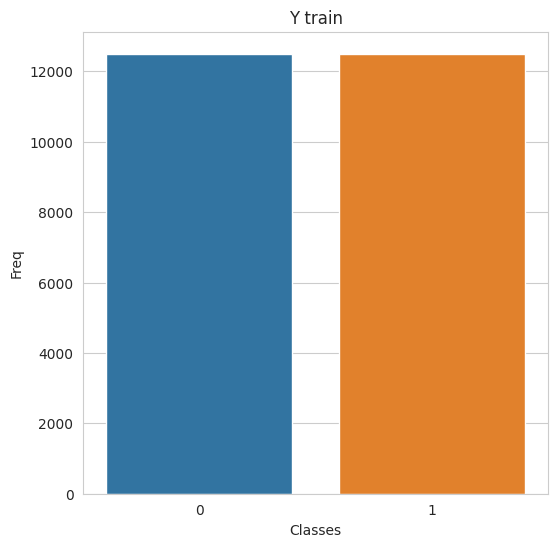

In [11]:
#Plot of the Training set
plt.figure(figsize = (6,6))
sns.countplot(x = Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

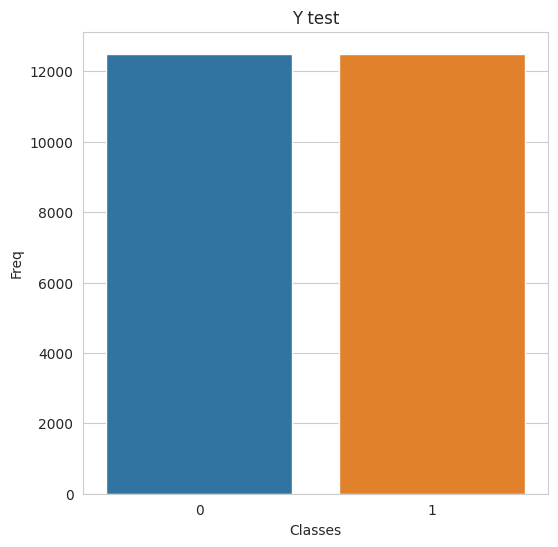

In [12]:
#Plot of the test set
plt.figure(figsize = (6,6))
sns.countplot(x = Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


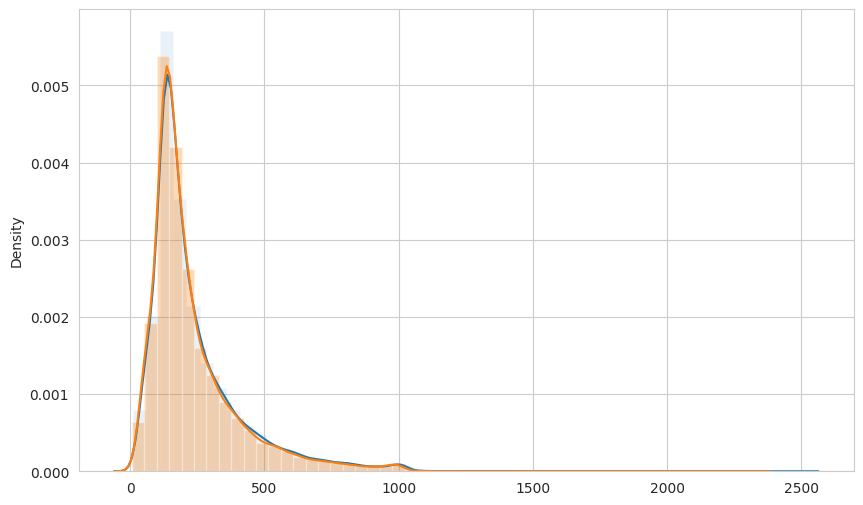

In [13]:
#Plot of the training and test set probability density distribution according to the length of the sequence
review_len_train = []
review_len_test = []
for i,ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

plt.figure(figsize = (10,6))
sns.distplot(review_len_train, hist_kws = {"alpha":0.1})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


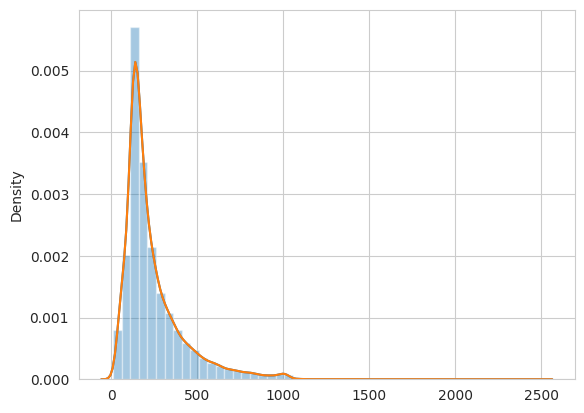

In [14]:
line = sns.distplot(review_len_train).get_lines()[0]
plt.plot(line.get_xdata(), line.get_ydata())

In [15]:
x_data = list(line.get_xdata())

In [16]:
y_data = list(line.get_ydata())

In [17]:
#Max distribution point of the sequence length according to the y-axis
np.argmax(y_data)

15

In [18]:
#Max distribution point sequence length
x_data[15]

138.82665607886247

In [19]:
#Statistics of the distribution
print("Train Mean:", np.mean(review_len_train))
print("Train Median:", np.median(review_len_train))
print("Train Mode:", stats.mode(review_len_train)[0][0])

Train Mean: 238.71364
Train Median: 178.0
Train Mode: 132


<ipython-input-19-3cf46ddd9682>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("Train Mode:", stats.mode(review_len_train)[0][0])


In [20]:
#Download the mapping to word data
word_index = imdb.get_word_index()
print(type(word_index))

1654784/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [21]:
#Function to decode the sequence in words
def whatItSay(X_tmp,index = 0):
    
    reverse_index = dict([(value,key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_tmp[index]])
    print(decode_review)
    
    return decode_review

In [22]:
decoded_review = whatItSay(X_train,10)

! french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ! romance bursting on to the scene maléfique preceded the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made maléfique was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ! by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named carrère sent to prison for fraud he is put in a cell with three others the quietly insane ! body building transvestite marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old journal after ! part of it they soon realise its magical powers and realise they may be able to use 

In [26]:
print(X_train[5])
decoded_review = whatItSay(X_train,5)

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br


## Data for training the post padded sequence data

In [27]:
maxlen = 200

In [28]:
def get_data(X_tmp_1,X_tmp_2,padding):
  X_train_pad = pad_sequences(X_tmp_1, maxlen = maxlen,padding= padding)
  X_test_pad = pad_sequences(X_tmp_2, maxlen = maxlen,padding= padding)

  print(X_train_pad[5])

    
  decoded_review = whatItSay(X_train_pad,5)
  return X_train_pad,X_test_pad

In [29]:
padding= 'post'
X_train_postpad,X_test_postpad = get_data(X_train,X_test,padding)

[   1  778  128   74   12  630  163   15    4 1766 7982 1051    2   32
   85  156   45   40  148  139  121  664  665   10   10 1361  173    4
  749    2   16 3804    8    4  226   65   12   43  127   24    2   10
   10    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

## Model definition

In [30]:
#Model function definition
def get_model(X_tmp_2):
  rnn = Sequential()
  rnn.add(Embedding(num_words, 32, input_length = len(X_tmp_2[0])))
  rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
  rnn.add(Dense(1))
  rnn.add(Activation("sigmoid"))

  print(rnn.summary())
  rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])
  return rnn

In [31]:
# Model
model_postpad = get_model(X_train_postpad)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#create callback for saving the checkpoint
filepath = 'rnn_model_postpad_imdb_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [ ]:
callbacks = [checkpoint]

## Train the postpad model

In [ ]:
history = model_postpad.fit(X_train_postpad,Y_train, validation_data = (X_test_postpad, Y_test),epochs = 20, batch_size = 128, verbose = 1,callbacks=callbacks)

Epoch 1/20
196/196 [==============================] - ETA: 0s - loss: 0.6821 - accuracy: 0.5456
Epoch 1: val_loss improved from inf to 0.67019, saving model to rnn_model_postpad_imdb_best_model.hdf5
196/196 [==============================] - 23s 113ms/step - loss: 0.6821 - accuracy: 0.5456 - val_loss: 0.6702 - val_accuracy: 0.5860
Epoch 2/20
196/196 [==============================] - ETA: 0s - loss: 0.6266 - accuracy: 0.6886
Epoch 2: val_loss improved from 0.67019 to 0.55368, saving model to rnn_model_postpad_imdb_best_model.hdf5
196/196 [==============================] - 21s 106ms/step - loss: 0.6266 - accuracy: 0.6886 - val_loss: 0.5537 - val_accuracy: 0.7614
Epoch 3/20
196/196 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.8116
Epoch 3: val_loss improved from 0.55368 to 0.48076, saving model to rnn_model_postpad_imdb_best_model.hdf5
196/196 [==============================] - 19s 97ms/step - loss: 0.5016 - accuracy: 0.8116 - val_loss: 0.4808 - val_accuracy: 0

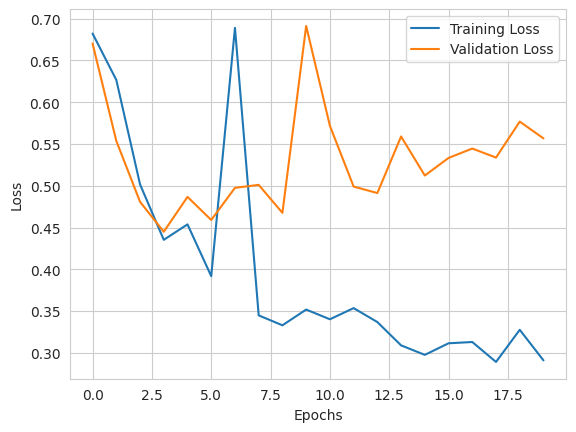

In [ ]:
#plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('model_postpad_training_history')
plt.show()

In [ ]:
Y_test

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
#Prediction and output
y_test_postpred = model_postpad.predict(X_test_postpad)
y_test_postpred = (y_test_postpred > 0.5)
y_test_postpred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
#PR and F1 score
print(classification_report(Y_test, y_test_postpred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80     12500
           1       0.82      0.76      0.79     12500

    accuracy                           0.79     25000
   macro avg       0.80      0.79      0.79     25000
weighted avg       0.80      0.79      0.79     25000



## Data Preparation and Training for the prepad model

In [ ]:
padding= 'pre'
X_train_prepad,X_test_prepad = get_data(X_train,X_test,padding)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24 

In [ ]:
# Model
model_prepad = get_model(X_train_prepad)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 32)           480000    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
 activation_9 (Activation)   (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#create callback for saving the checkpoint
filepath = 'rnn_model_prepad_imdb_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [ ]:
callbacks = [checkpoint]

In [ ]:
history = model_prepad.fit(X_train_prepad, Y_train, validation_data = (X_test_prepad, Y_test),epochs = 20, batch_size = 128, verbose = 1,callbacks=callbacks)

Epoch 1/20
196/196 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.6759
Epoch 1: val_loss improved from inf to 0.47051, saving model to rnn_model_prepad_imdb_best_model.hdf5
196/196 [==============================] - 20s 96ms/step - loss: 0.5977 - accuracy: 0.6759 - val_loss: 0.4705 - val_accuracy: 0.7949
Epoch 2/20
195/196 [============================>.] - ETA: 0s - loss: 0.4006 - accuracy: 0.8393
Epoch 2: val_loss did not improve from 0.47051
196/196 [==============================] - 21s 108ms/step - loss: 0.4005 - accuracy: 0.8393 - val_loss: 0.5872 - val_accuracy: 0.7828
Epoch 3/20
196/196 [==============================] - ETA: 0s - loss: 0.2946 - accuracy: 0.8827
Epoch 3: val_loss did not improve from 0.47051
196/196 [==============================] - 20s 102ms/step - loss: 0.2946 - accuracy: 0.8827 - val_loss: 0.5195 - val_accuracy: 0.8075
Epoch 4/20
196/196 [==============================] - ETA: 0s - loss: 0.2481 - accuracy: 0.9022
Epoch 4: val_loss i

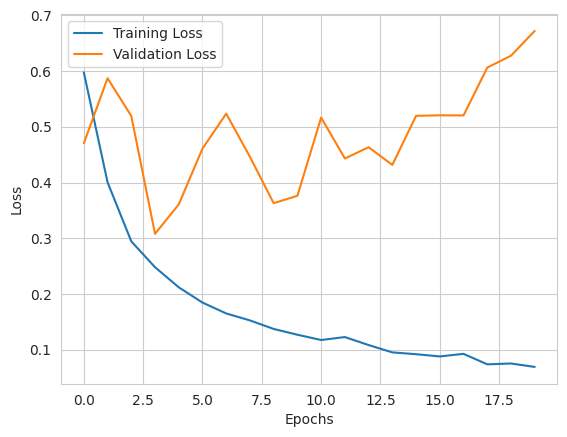

In [ ]:
#plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('model_prepad_training_history')
plt.show()

In [ ]:
#Prediction and output
y_test_prepred = model_prepad.predict(X_test_prepad)
y_test_prepred = (y_test_prepred > 0.5)
y_test_prepred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#PR and F1 score
print(classification_report(Y_test, y_test_prepred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     12500
           1       0.89      0.77      0.82     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.83     25000
weighted avg       0.84      0.84      0.83     25000



## Analysis of Postpad model

In [165]:
#Load and evaluate the best postpad model version
filepath = 'rnn_model_postpad_imdb_best_model.hdf5'
model = load_model(filepath)

In [166]:
#Gives the layer wise output
#layerInput: Input array
#layerIndex: Expected layer output
#index: Input layer
def layerwise_output(layerInput,layerIndex = 3,index = 0):
  # layerIndex = 3
  func = K.function([model.get_layer(index=index).input], model.get_layer(index=layerIndex).output)
  tmp_layerOutput = func([layerInput]) 
  print(tmp_layerOutput[0])
  return tmp_layerOutput

In [167]:
maxlen = 200
X_test_pre_pad = pad_sequences(X_test, maxlen = maxlen,padding='pre')
X_test_post_pad = pad_sequences(X_test, maxlen = maxlen,padding='post')

In [168]:
y_pred_pre = model.predict(X_test_pre_pad)

In [169]:
y_pred_post = model.predict(X_test_post_pad)

In [170]:
y_pred_pre

array([[0.1734682 ],
       [0.9993086 ],
       [0.62047434],
       ...,
       [0.2877969 ],
       [0.11892655],
       [0.6193492 ]], dtype=float32)

In [171]:
y_pred_post

array([[0.16482541],
       [0.9993086 ],
       [0.62047434],
       ...,
       [0.16482556],
       [0.16482577],
       [0.7588492 ]], dtype=float32)

In [178]:
X_test_pre_pad[5]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,   146,   427,  5718,
          14,    20,   218,   112,  2962,    32,    37,   119,    14,
          20,   144,  9493,   910,     5,  8817,     4,  4659,    18,
          12,  3403,   853,    28,     8,  2225,    12,    95,   474,
         818,  4651,    18,  1462,    13,   124,   285,     5,  1462,
          11,    14,    20,   122,     6,    52,   292,     5,    13,
         774,  2626,    46,   138,   910,  1481,   276,    14,    20,
          23,   288,

In [176]:
decoded_review = whatItSay(X_test_pre_pad,5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap download it deserves the real thing i'm them now this movie will be on dvd


In [174]:
X_test_post_pad[5]

array([    1,   146,   427,  5718,    14,    20,   218,   112,  2962,
          32,    37,   119,    14,    20,   144,  9493,   910,     5,
        8817,     4,  4659,    18,    12,  3403,   853,    28,     8,
        2225,    12,    95,   474,   818,  4651,    18,  1462,    13,
         124,   285,     5,  1462,    11,    14,    20,   122,     6,
          52,   292,     5,    13,   774,  2626,    46,   138,   910,
        1481,   276,    14,    20,    23,   288,    42,    23,  1856,
          11,  2364,  5687,    33,   222,    13,   774,   110,   101,
        4651,    14,     9,     6,  3799,    52,    20,     5,   144,
          30,   110,    34,    32,     4,   362,    11,     4,   162,
        2248,    92,    79,     8,    67,    12,     5,    13,   104,
          36,   144,    12,   144,    33,   222,    30,   276,   145,
          23,     4,  1308,    14,    20,   152,  1833,     6,   706,
       10134,    12,  1015,     4,   147,   155,   146,    98,   150,
          14,    20,

In [177]:
decoded_review = whatItSay(X_test_post_pad,5)

! i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap download it deserves the real thing i'm them now this movie will be on dvd ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !


In [179]:
#Embedding layer output of Prepadded sequence
layerIndex = 0
index = 0
layerOutput_pre_pad = layerwise_output(X_test_pre_pad,layerIndex,index)

[[ 0.0137097  -0.00762276 -0.01451159 ...  0.01784327  0.00890206
  -0.04269288]
 [ 0.0137097  -0.00762276 -0.01451159 ...  0.01784327  0.00890206
  -0.04269288]
 [ 0.0137097  -0.00762276 -0.01451159 ...  0.01784327  0.00890206
  -0.04269288]
 ...
 [ 0.01990509 -0.01339087  0.06965964 ...  0.04043662  0.01637304
   0.01572584]
 [-0.03245073 -0.02387469 -0.01697545 ...  0.00623269 -0.01478282
   0.01179936]
 [-0.0302474   0.02778369  0.1230685  ... -0.06743828  0.04354285
  -0.06764771]]


In [180]:
#Embedding layer output of Postpadded sequence
layerIndex = 0
index = 0
layerOutput_post_pad = layerwise_output(X_test_post_pad,layerIndex,index)

[[ 0.04552212 -0.00395773 -0.01216506 ...  0.0442645   0.02962646
   0.06547148]
 [-0.0321891  -0.02792823 -0.02504059 ...  0.04116902 -0.07953039
  -0.00495925]
 [-0.03047558 -0.00143173  0.0721882  ... -0.01561093  0.0256364
  -0.05070271]
 ...
 [ 0.0137097  -0.00762276 -0.01451159 ...  0.01784327  0.00890206
  -0.04269288]
 [ 0.0137097  -0.00762276 -0.01451159 ...  0.01784327  0.00890206
  -0.04269288]
 [ 0.0137097  -0.00762276 -0.01451159 ...  0.01784327  0.00890206
  -0.04269288]]


In [244]:
#Creating the stack of the sequence
j_embed = 0  #Select the sequence

In [245]:
#Creating the copy
layerOutput_pre_pad_1 = layerOutput_pre_pad[j_embed].copy()
layerOutput_post_pad_1 = layerOutput_post_pad[j_embed].copy()

In [246]:
#Function for replacing the embeddings with 0 vectors
#layerOutput_0: Embeddings where 0 vector is to be replaced
#X_tmp_embed: padded sequence input
def replace_embeddings(layerOutput_0,X_tmp_embed):
  for i in range(maxlen):
  
    if X_tmp_embed[j_embed][i] == 0:
      for j in range(32):
        layerOutput_0[i][j] = 0
  return layerOutput_0

In [247]:
#Replace embedding of prepadded sequence
layerOutput_pre_pad_1 = replace_embeddings(layerOutput_pre_pad_1,X_test_pre_pad)      

In [248]:
layerOutput_pre_pad_1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01990509, -0.01339087,  0.06965964, ...,  0.04043662,
         0.01637304,  0.01572584],
       [-0.03245073, -0.02387469, -0.01697545, ...,  0.00623269,
        -0.01478282,  0.01179936],
       [-0.0302474 ,  0.02778369,  0.1230685 , ..., -0.06743828,
         0.04354285, -0.06764771]], dtype=float32)

In [249]:
#Replace embedding of postpadded sequence
layerOutput_post_pad_1 = replace_embeddings(layerOutput_post_pad_1,X_test_post_pad)

In [250]:
layerOutput_post_pad_1

array([[ 0.04552212, -0.00395773, -0.01216506, ...,  0.0442645 ,
         0.02962646,  0.06547148],
       [-0.0321891 , -0.02792823, -0.02504059, ...,  0.04116902,
        -0.07953039, -0.00495925],
       [-0.03047558, -0.00143173,  0.0721882 , ..., -0.01561093,
         0.0256364 , -0.05070271],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [251]:
#Output of the Final layer with 0 vector replaced embeddings for the prepadded sequence
layerIndex = 3
index = 1
final_Output_prepad = layerwise_output(np.expand_dims(layerOutput_pre_pad_1, axis=0),layerIndex,index)

[0.1734682]


In [252]:
#Output of the Final layer with 0 vector replaced embeddings for the prepadded sequence
layerIndex = 3
index = 1
final_Output_postpad = layerwise_output(np.expand_dims(layerOutput_post_pad_1, axis=0),layerIndex,index)

[0.29144335]


In [253]:
layerOutput_pre_pad_1[132]

array([ 0.04552212, -0.00395773, -0.01216506,  0.03285711, -0.00532767,
       -0.06075055,  0.05620637,  0.00788563,  0.01374264, -0.07365733,
        0.01236773,  0.04411464,  0.04278803,  0.0459995 , -0.08497547,
       -0.02594138,  0.00456636,  0.06985252,  0.07804532,  0.05379283,
       -0.04083571, -0.01256316, -0.08632506,  0.03461317, -0.0662659 ,
       -0.06418122,  0.02226632,  0.05871281, -0.02081866,  0.0442645 ,
        0.02962646,  0.06547148], dtype=float32)

In [254]:
layerOutput_post_pad_1[0]

array([ 0.04552212, -0.00395773, -0.01216506,  0.03285711, -0.00532767,
       -0.06075055,  0.05620637,  0.00788563,  0.01374264, -0.07365733,
        0.01236773,  0.04411464,  0.04278803,  0.0459995 , -0.08497547,
       -0.02594138,  0.00456636,  0.06985252,  0.07804532,  0.05379283,
       -0.04083571, -0.01256316, -0.08632506,  0.03461317, -0.0662659 ,
       -0.06418122,  0.02226632,  0.05871281, -0.02081866,  0.0442645 ,
        0.02962646,  0.06547148], dtype=float32)

## Analysis of Prepad model

In [255]:
#Load and evaluate the best prepad model version
filepath = 'rnn_model_prepad_imdb_best_model.hdf5'
model = load_model(filepath)

In [256]:
y_pred_pre_1 = model.predict(X_test_pre_pad)

In [257]:
y_pred_post_1 = model.predict(X_test_post_pad)

In [258]:
# y_pred_pre_1

In [259]:
# y_pred_post_1

In [260]:
decoded_review = whatItSay(X_test_post_pad,0)

! please give this one a miss br br ! swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ! so all you madison fans give this a miss ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !


In [261]:
#Embedding layer output of Prepadded sequence
layerIndex = 0
index = 0
layerOutput_pre_pad_v1 = layerwise_output(X_test_pre_pad,layerIndex,index)

[[-0.00853232 -0.07033881 -0.03236642 ... -0.01031755  0.03826723
  -0.05035369]
 [-0.00853232 -0.07033881 -0.03236642 ... -0.01031755  0.03826723
  -0.05035369]
 [-0.00853232 -0.07033881 -0.03236642 ... -0.01031755  0.03826723
  -0.05035369]
 ...
 [-0.00752096 -0.0836526   0.05070426 ... -0.02168434  0.04898031
  -0.0096606 ]
 [ 0.00992115  0.04956681 -0.06360397 ...  0.02319761  0.06393252
  -0.04777845]
 [ 0.08941394 -0.08481058  0.09274139 ... -0.01560183 -0.11395704
   0.02806044]]


In [262]:
#Embedding layer output of Postpadded sequence
layerIndex = 0
index = 0
layerOutput_post_pad_v1 = layerwise_output(X_test_post_pad,layerIndex,index)

[[ 0.01223437 -0.025854   -0.07438473 ...  0.0211369  -0.02542307
   0.07951292]
 [-0.00616196 -0.1065156   0.0316717  ... -0.02201712  0.05031917
   0.00905376]
 [ 0.01753514 -0.02368526 -0.01918118 ...  0.06124752  0.0767805
   0.05943852]
 ...
 [-0.00853232 -0.07033881 -0.03236642 ... -0.01031755  0.03826723
  -0.05035369]
 [-0.00853232 -0.07033881 -0.03236642 ... -0.01031755  0.03826723
  -0.05035369]
 [-0.00853232 -0.07033881 -0.03236642 ... -0.01031755  0.03826723
  -0.05035369]]


In [263]:
#Creating the stack of the sequence
j_embed = 0  #Select the sequence

In [264]:
#Creating the copy
layerOutput_pre_pad_v1_1 = layerOutput_pre_pad_v1[j_embed].copy()
layerOutput_post_pad_v1_1 = layerOutput_post_pad_v1[j_embed].copy()

In [265]:
layerOutput_pre_pad_v1_1

array([[-0.00853232, -0.07033881, -0.03236642, ..., -0.01031755,
         0.03826723, -0.05035369],
       [-0.00853232, -0.07033881, -0.03236642, ..., -0.01031755,
         0.03826723, -0.05035369],
       [-0.00853232, -0.07033881, -0.03236642, ..., -0.01031755,
         0.03826723, -0.05035369],
       ...,
       [-0.00752096, -0.0836526 ,  0.05070426, ..., -0.02168434,
         0.04898031, -0.0096606 ],
       [ 0.00992115,  0.04956681, -0.06360397, ...,  0.02319761,
         0.06393252, -0.04777845],
       [ 0.08941394, -0.08481058,  0.09274139, ..., -0.01560183,
        -0.11395704,  0.02806044]], dtype=float32)

In [266]:
#Replace embedding of prepadded sequence
layerOutput_pre_pad_v1_1 = replace_embeddings(layerOutput_pre_pad_v1_1,X_test_pre_pad)      

In [267]:
#Replace embedding of postpadded sequence
layerOutput_post_pad_v1_1 = replace_embeddings(layerOutput_post_pad_v1_1,X_test_post_pad)      

In [268]:
#Output of the Final layer with 0 vector replaced embeddings for the prepadded sequence
layerIndex = 3
index = 1
final_Output_prepad = layerwise_output(np.expand_dims(layerOutput_pre_pad_v1_1, axis=0),layerIndex,index)

[0.01203719]


In [269]:
#Output of the Final layer with 0 vector replaced embeddings for the prepadded sequence
layerIndex = 3
index = 1
final_Output_prepad = layerwise_output(np.expand_dims(layerOutput_post_pad_v1_1, axis=0),layerIndex,index)

[0.06152868]


In [270]:
layerOutput_pre_pad_v1_1[132]

array([ 0.01223437, -0.025854  , -0.07438473,  0.05101241, -0.02748957,
       -0.01700239,  0.04800894,  0.04205093,  0.07161769,  0.00838763,
        0.01882657, -0.09150523, -0.02646472,  0.02949185, -0.00036047,
        0.01634278,  0.02680162, -0.09463005, -0.01522363, -0.02137815,
        0.00494988, -0.02639212, -0.07486337,  0.02090753, -0.07777564,
       -0.03018101,  0.0015233 ,  0.01038992, -0.04058895,  0.0211369 ,
       -0.02542307,  0.07951292], dtype=float32)

In [271]:
layerOutput_post_pad_v1_1[0]

array([ 0.01223437, -0.025854  , -0.07438473,  0.05101241, -0.02748957,
       -0.01700239,  0.04800894,  0.04205093,  0.07161769,  0.00838763,
        0.01882657, -0.09150523, -0.02646472,  0.02949185, -0.00036047,
        0.01634278,  0.02680162, -0.09463005, -0.01522363, -0.02137815,
        0.00494988, -0.02639212, -0.07486337,  0.02090753, -0.07777564,
       -0.03018101,  0.0015233 ,  0.01038992, -0.04058895,  0.0211369 ,
       -0.02542307,  0.07951292], dtype=float32)